# Understanding Marginal Densities: Air Temperature and Ice Cream Sales

In this notebook, we explore the concept of marginal densities in the context of probability distributions. We use a relatable example of air temperature and ice cream sales to demonstrate how these densities are computed and interpreted, both in independent and dependent scenarios.

## Key Concepts

- **Probability Density Function (PDF):** For a continuous random variable $X$, the PDF, denoted as $f_X(x)$, describes the relative likelihood of the random variable taking on the value $x$. It is defined such that the probability of $X$ falling within a particular interval $[a, b]$ is given by the integral:
$$ P(a \leq X \leq b) = \int_{a}^{b} f_X(x) \, dx $$
The PDF is non-negative everywhere, and the total area under the curve of the PDF is equal to 1.

- **Joint Density Function:** For two continuous random variables $X$ and $Y$, the joint probability density function, denoted as $f_{X,Y}(x, y)$, represents the likelihood of $X$ taking on value $x$ *and* $Y$ taking on value $y$ simultaneously. It is given by the product of the individual PDFs if $X$ and $Y$ are independent:
$$ f_{X,Y}(x, y) = f_X(x) \cdot f_Y(y) $$

- **Marginal Density Function:** The marginal density function of $X$, denoted as $f_X(x)$, is obtained by integrating the joint density over all possible values of $Y$:
$$ f_X(x) = \int_{-\infty}^{\infty} f_{X,Y}(x, y) \, dy $$
Similarly, the marginal density function of $Y$ is obtained by integrating the joint density over all possible values of $X$:
$$ f_Y(y) = \int_{-\infty}^{\infty} f_{X,Y}(x, y) \, dx $$
The marginal density functions show the probabilities of the individual variables irrespective of the values of the other variables.

Our aim is to understand how the joint distribution of two variables can be used to find their individual marginal distributions and how these distributions change under independence and dependence.


## Independent Distributions Example: Air Temperature and Ice Cream Sales

In this part, we consider air temperature and ice cream sales as independent variables. We assume that the temperature is normally distributed with a mean of 80°F and a standard deviation of 10°F. Similarly, ice cream sales are also normally distributed with a mean of 100 units and a standard deviation of 20 units. Since these are independent, the variations in temperature do not affect ice cream sales and vice versa.

Let's visualize their joint distribution and individual marginal densities.

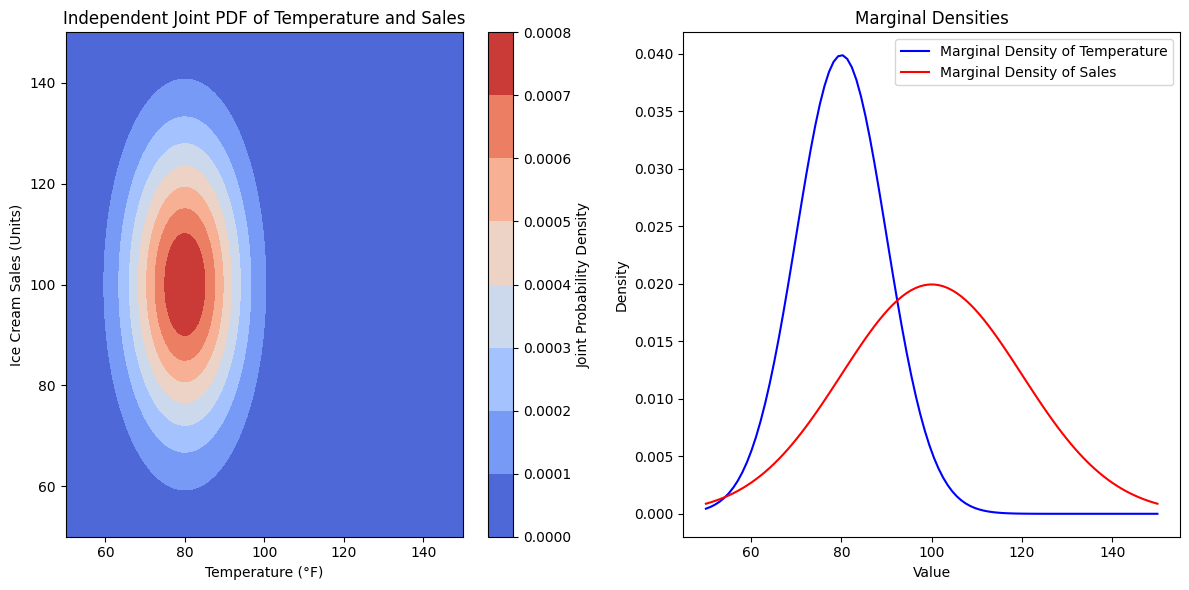

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

# Parameters for the independent scenario
mean_independent = [80, 100]  # Mean of Temperature (X) in Fahrenheit and Ice Cream Sales (Y)
std_dev_independent = [10, 20]  # Standard deviation of Temperature (X) and Ice Cream Sales (Y)
cov_independent = [[std_dev_independent[0] * std_dev_independent[0], 0], 
                   [0, std_dev_independent[1] * std_dev_independent[1]]]  # Variance of Temperature and Sales, no covariance

# Create a grid of (x, y) values
x = np.linspace(50, 150, 100)  # Range for temperature
y = np.linspace(50, 150, 100)  # Range for sales
X, Y = np.meshgrid(x, y)

# Joint probability density function for independent Temperature and Sales
joint_pdf_independent = multivariate_normal(mean_independent, cov_independent).pdf(np.dstack((X, Y)))

# Marginal densities for Temperature and Sales
marginal_temp = norm.pdf(x, mean_independent[0], std_dev_independent[0])
marginal_sales = norm.pdf(y, mean_independent[1], std_dev_independent[1])

# Plotting the independent scenario
plt.figure(figsize=(12, 6))

# Plot the independent joint PDF
plt.subplot(1, 2, 1)
contour_plot = plt.contourf(X, Y, joint_pdf_independent, cmap='coolwarm')
plt.colorbar(contour_plot, label='Joint Probability Density')
plt.title('Independent Joint PDF of Temperature and Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Ice Cream Sales (Units)')

# Plot the marginal densities
plt.subplot(1, 2, 2)
plt.plot(x, marginal_temp, color='blue', label='Marginal Density of Temperature')
plt.plot(y, marginal_sales, color='red', label='Marginal Density of Sales')
plt.title('Marginal Densities')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


## Introducing Dependence: Warmer Weather Increases Ice Cream Sales

In reality, temperature and ice cream sales are likely to be dependent. For instance, warmer weather might lead to increased ice cream sales. To model this, we introduce a covariance between the temperature and sales in our joint distribution. This dependence is a realistic representation of how these two variables might interact in the real world.

Let's visualize the joint distribution and observe how it changes with the introduction of this dependence, while noting that the marginal densities remain the same.


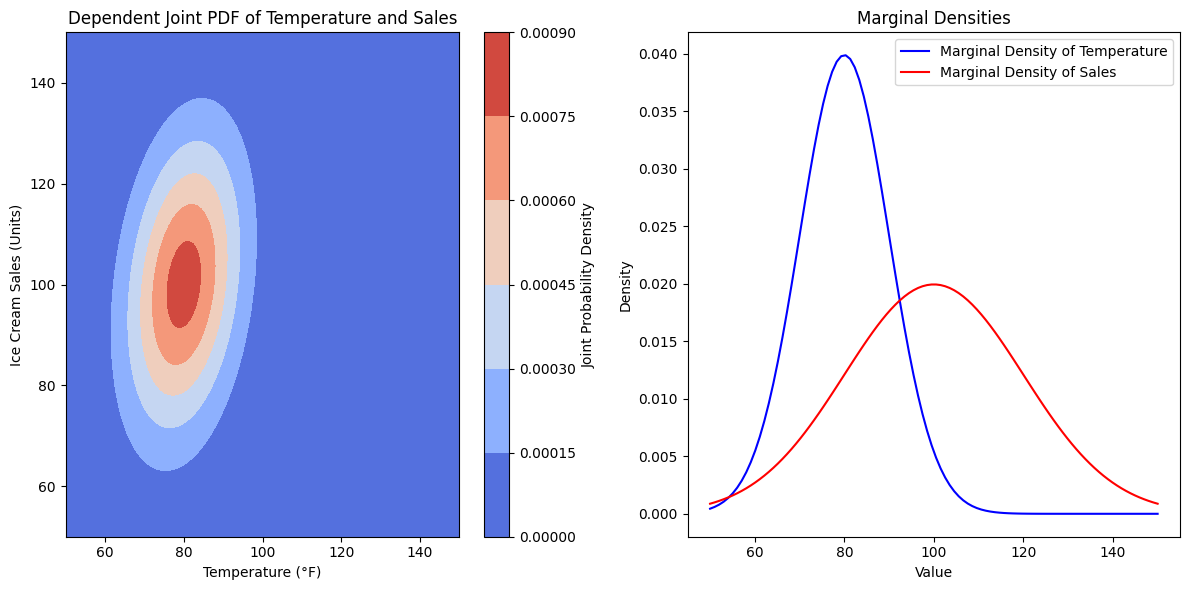

In [12]:
# Parameters for the dependent scenario - introducing covariance
cov_dependent = [[std_dev_independent[0] * std_dev_independent[0], 50], 
                 [50, std_dev_independent[1] * std_dev_independent[1]]]  # Introduce covariance for the dependent scenario

# Joint probability density function for dependent Temperature and Sales
joint_pdf_dependent = multivariate_normal(mean_independent, cov_dependent).pdf(np.dstack((X, Y)))

# Plotting the dependent scenario
plt.figure(figsize=(12, 6))

# Plot the dependent joint PDF
plt.subplot(1, 2, 1)
contour_plot = plt.contourf(X, Y, joint_pdf_dependent, cmap='coolwarm')
plt.colorbar(contour_plot, label='Joint Probability Density')
plt.title('Dependent Joint PDF of Temperature and Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Ice Cream Sales (Units)')

# Plot the marginal densities (unchanged from the independent scenario)
plt.subplot(1, 2, 2)
plt.plot(x, marginal_temp, color='blue', label='Marginal Density of Temperature')
plt.plot(y, marginal_sales, color='red', label='Marginal Density of Sales')
plt.title('Marginal Densities')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


## Conclusion

Through this notebook, we have explored the concepts of marginal densities in the context of joint probability distributions. We observed how the marginal densities of air temperature and ice cream sales remain constant, irrespective of whether these two variables are independent or dependent.

- In the **independent scenario**, variations in temperature did not affect ice cream sales.
- In the **dependent scenario**, we introduced a realistic dependence, showing how higher temperatures could lead to increased ice cream sales. This change affected the joint distribution but not the marginal distributions.

This exercise demonstrates the importance of understanding marginal densities and their role in statistical analysis, especially when dealing with joint distributions of multiple variables. It highlights how marginal distributions focus on individual variables, abstracting away from their possible relationships with others.

## Additional Resources

For those interested in further exploring the topics of probability distributions, marginal densities, and their applications in real-world scenarios, here are some additional resources:

- [Khan Academy: Probability and Statistics](https://www.khanacademy.org/math/statistics-probability)
- [MIT OpenCourseWare: Introduction to Probability and Statistics](https://ocw.mit.edu/courses/res-6-012-introduction-to-probability-spring-2018/)
- [Stanford Online: Statistical Learning](https://online.stanford.edu/courses/sohs-ystatslearning-statistical-learning)

These resources provide a more in-depth look into the foundational concepts and advanced applications in the field of statistics and probability.
